# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [4]:
#Your code here
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [89]:
df[['FormalEducation','AdjustedCompensation']].head()

,FormalEducation,AdjustedCompensation
0,Bachelor's degree,NaN
1,Master's degree,NaN
2,Master's degree,NaN
3,Master's degree,250000.0
4,Doctoral degree,NaN


In [91]:
df2 = df[['FormalEducation','AdjustedCompensation']].dropna()
df2.head()

,FormalEducation,AdjustedCompensation
3,Master's degree,250000.0
8,Bachelor's degree,64184.8
9,Bachelor's degree,20882.4
11,Bachelor's degree,1483.9
14,Master's degree,36634.4


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [67]:
#Your code here
import flatiron_stats as fs

In [103]:
sample_ms = df2[df2.FormalEducation == "Master's degree"]['AdjustedCompensation']
sample_ms.head()

3     250000.000
14     36634.400
27     53352.000
31     35419.104
37     80000.000
Name: AdjustedCompensation, dtype: float64

In [93]:
sample_b = df2[df2.FormalEducation == "Bachelor's degree"]['AdjustedCompensation'].dropna()
sample_b.head()

8     64184.800
9     20882.400
11     1483.900
21    20000.000
25    10858.848
Name: AdjustedCompensation, dtype: float64

Masters vs Bachelor
Mean value for masters=69140 and bachelors=64887
Median value for masters=53812 and bachelors=38399
Sample size for masters=1990 and bachelors=1107
p-value for one-sided Welch's test:0.33077639451272267


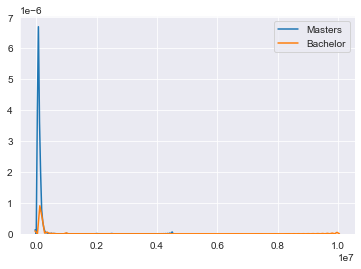

In [118]:
sns.kdeplot(sample_ms, label='Masters')
sns.kdeplot(sample_b, label='Bachelor')

p = fs.p_value_welch_ttest(sample_ms, sample_b, two_sided=False)

print('Masters vs Bachelor')
print(f"""Mean value for masters={round(sample_ms.mean())} and bachelors={round(sample_b.mean())}""")
print(f"""Median value for masters={round(sample_ms.median())} and bachelors={round(sample_b.median())}""")
print(f"""Sample size for masters={len(sample_ms)} and bachelors={len(sample_b)}""")

print(f"""p-value for one-sided Welch's test:{p}""")

Masters vs Bachelor without Outliers
Mean value for masters=63977 and bachelors=53744
Median value for masters=53540 and bachelors=38292
Sample size for masters=1985 and bachelors=1103
p-value for one-sided Welch's test without Outliers:4.4874583271514723e-07


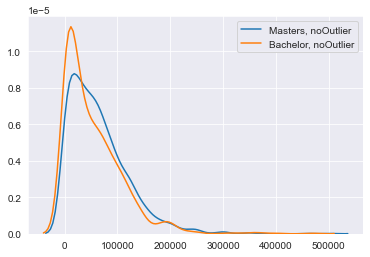

In [142]:
threshold = 500000

sample_ms_noOutlier = sample_ms[sample_ms<=threshold]
sample_b_noOutlier = sample_b[sample_b<=threshold]

sns.kdeplot(sample_ms_noOutlier, label='Masters, noOutlier')
sns.kdeplot(sample_b_noOutlier, label='Bachelor, noOutlier')

p = fs.p_value_welch_ttest(sample_ms_noOutlier, sample_b_noOutlier, two_sided=False)

print('Masters vs Bachelor without Outliers')
print(f"""Mean value for masters={round(sample_ms_noOutlier.mean())} and bachelors={round(sample_b_noOutlier.mean())}""")
print(f"""Median value for masters={round(sample_ms_noOutlier.median())} and bachelors={round(sample_b_noOutlier.median())}""")
print(f"""Sample size for masters={len(sample_ms_noOutlier)} and bachelors={len(sample_b_noOutlier)}""")

print(f"""p-value for one-sided Welch's test without Outliers:{p}""")

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [114]:
#Your code here
print(df['FormalEducation'].unique())
sample_d = df2[df2.FormalEducation == "Doctoral degree"]['AdjustedCompensation']
sample_d.head()

["Bachelor's degree" "Master's degree" 'Doctoral degree' nan
 "Some college/university study without earning a bachelor's degree"
 'I did not complete any formal education past high school'
 'Professional degree' 'I prefer not to answer']


22    100000.000
32    172144.440
34    133000.000
61     15000.000
72     43049.736
Name: AdjustedCompensation, dtype: float64

Doctoral vs Bachelor:
Mean value for doctoral=29566176 and bachelors=64887
Median value for doctoral=74132 and bachelors=38399
Sample size for doctoral=967 and bachelors=1107
p-value for one-sided Welch's test:0.1568238199472023


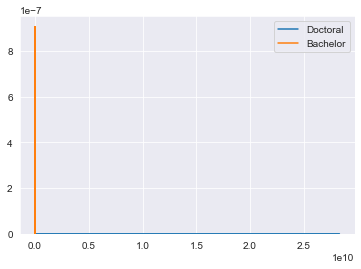

In [127]:
sns.kdeplot(sample_d, label='Doctoral')
sns.kdeplot(sample_b, label='Bachelor')

p = fs.p_value_welch_ttest(sample_d, sample_b, two_sided=False)

print('Doctoral vs Bachelor:')
print(f"""Mean value for doctoral={round(sample_d.mean())} and bachelors={round(sample_b.mean())}""")
print(f"""Median value for doctoral={round(sample_d.median())} and bachelors={round(sample_b.median())}""")
print(f"""Sample size for doctoral={len(sample_d)} and bachelors={len(sample_b)}""")

print(f"""p-value for one-sided Welch's test:{p}""")

Masters vs Bachelor without Outliers
Mean value for doctoral=86195 and bachelors=53744
Median value for doctoral=73153 and bachelors=38292
Sample size for doctoral=964 and bachelors=1103
p-value for one-sided Welch's test without Outliers:0.0


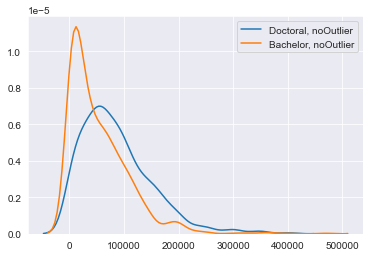

In [141]:
threshold = 500000

sample_d_noOutlier = sample_d[sample_d<=threshold]
sample_b_noOutlier = sample_b[sample_b<=threshold]

sns.kdeplot(sample_d_noOutlier, label='Doctoral, noOutlier')
sns.kdeplot(sample_b_noOutlier, label='Bachelor, noOutlier')

p = fs.p_value_welch_ttest(sample_d_noOutlier, sample_b_noOutlier, two_sided=False)

print('Masters vs Bachelor without Outliers')
print(f"""Mean value for doctoral={round(sample_d_noOutlier.mean())} and bachelors={round(sample_b_noOutlier.mean())}""")
print(f"""Median value for doctoral={round(sample_d_noOutlier.median())} and bachelors={round(sample_b_noOutlier.median())}""")
print(f"""Sample size for doctoral={len(sample_d_noOutlier)} and bachelors={len(sample_b_noOutlier)}""")

print(f"""p-value for one-sided Welch's test without Outliers:{p}""")

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [135]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

print('Anova Test')
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

Anova Test
                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [140]:
print('Anova Test without Outliers')
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, df2[df2.AdjustedCompensation<=threshold]).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

Anova Test without Outliers
                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!